# Introduction

#####   This report presents an analysis of the electric vehicle (EV) market (in USA), focusing on key trends in adoption, geographical distribution, types of EVs, popular makes and models, electric range, and market growth projections. By examining these aspects, we aim to provide valuable insights into the current state and future prospects of the EV industry.

## Importing The Necessary Libraries:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

##### - Handling missing values

In [16]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [17]:
# dropping missing values from the dataset
df = df.dropna()

In [18]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**
     
   - **6 -** Market Growth Projections:

     -  How can we calculate the Compound Annual Growth Rate (CAGR) to forecast the total number of electric vehicles (EVs) expected to be registered in 2024 and estimate the market size for the next five years?

-  **Note:** 
   -  *In 2024, 7072 EVs ara registered which suggests that the dataset for 2024 is incomplete.* 

In [19]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [20]:
df_registered = df['Model Year'].value_counts().sort_index()
df_registered

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [21]:

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = df_registered[df_registered.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


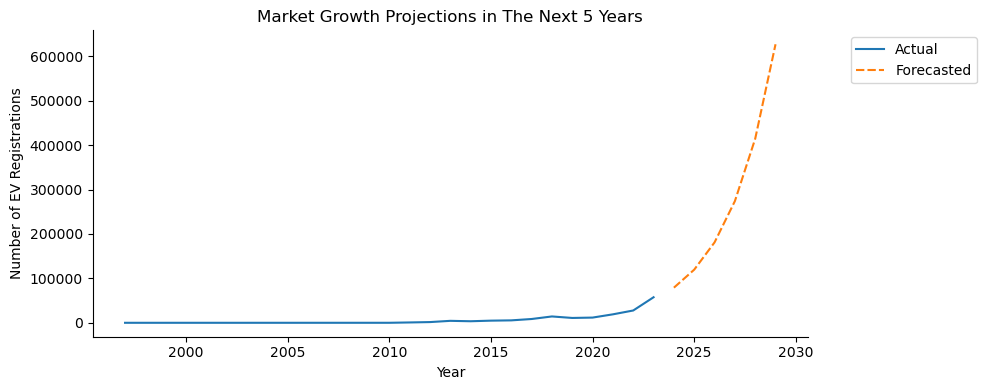

In [37]:

# Prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# Actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]


plotting_data = {
    'Year': list(actual_years) + list(forecast_years_full),
    'Registrations': list(actual_values) + forecasted_values_full,
    'Type': ['Actual'] * len(actual_years) + ['Forecasted'] * len(forecast_years_full)
}
df_plot = pd.DataFrame(plotting_data)

plt.figure(figsize=(10, 4))

# Plot using seaborn
sns.lineplot(data=df_plot, x='Year', y='Registrations', hue='Type', style='Type')

plt.title('Market Growth Projections in The Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


sns.despine()
plt.tight_layout()
plt.show()


-   **Key Insights:**
    -   Historical Growth:

        -   From 2021 to 2023, there has been a notable increase in the number of EV registrations. The figures rose from 19,063 in 2021 to 27,708 in 2022, and then significantly jumped to 57,519 in 2023. This upward trend indicates a growing adoption of electric vehicles over recent years.

    -   Forecasted Growth:

        -   The forecasted data shows an exponential increase in EV registrations from 2024 onwards. This sharp rise suggests a strong expected market growth, driven by factors such as technological advancements, government incentives, and increasing consumer demand for sustainable transportation options.

    -   Market Expansion:

        -   By 2029, the number of EV registrations is projected to reach over 600,000. This substantial growth highlights the potential for the EV market to become a significant segment of the automotive industry.

    -   Partial Data for 2024:

        -   The data for 2024, currently at 7,072 registrations, is incomplete as it only includes figures till March. However, using the growth rate from previous years, the total number of EVs expected to be registered in 2024 can be projected to provide a more accurate estimate.